# Fixing CIOPS-W Bathymetry File
Wowee zowee - lots of values that don't make sense and are causing problems in running Ariane. Change all of these to 0!

In [1]:
import numpy as np
import pandas as pd
import xarray as xr

In [2]:
data = xr.open_dataset('/ocean/mdunphy/mesh_mask.nc')

In [3]:
bathy = data['mbathy']

In [4]:
bathy = bathy.where(bathy>0,0)

In [5]:
bathy = bathy.where(bathy<=5000,0) #5000 chosen as the cut-off as that should be the max depth for the CIOP-W model domain

In [6]:
# bathy = bathy.squeeze(drop=True)

In [7]:
data['mbathy'] = bathy

In [6]:
data

<xarray.Dataset>
Dimensions:       (y: 1021, x: 715, z: 50, t: 1)
Dimensions without coordinates: y, x, z, t
Data variables: (12/44)
    nav_lon       (y, x) float32 ...
    nav_lat       (y, x) float32 ...
    nav_lev       (z) float32 ...
    time_counter  (t) float64 ...
    tmask         (t, z, y, x) int8 ...
    umask         (t, z, y, x) int8 ...
    ...            ...
    gdepv         (t, z, y, x) float32 ...
    gdepw_0       (t, z, y, x) float32 ...
    gdept_1d      (t, z) float64 ...
    gdepw_1d      (t, z) float64 ...
    e3t_1d        (t, z) float64 ...
    e3w_1d        (t, z) float64 ...
Attributes:
    file_name:  mesh_mask.nc
    TimeStamp:  29/05/2019 23:53:26 -0000

In [13]:
# data = data.squeeze(drop=True)

In [9]:
#data.to_netcdf('CIOPS_mesh_mask.nc')

In [7]:
xr.open_dataset('/home/sallen/MEOPAR/grid/mesh_mask201702.nc')

<xarray.Dataset>
Dimensions:       (y: 898, x: 398, t: 1, z: 40)
Dimensions without coordinates: y, x, t, z
Data variables: (12/43)
    nav_lon       (y, x) float32 ...
    nav_lat       (y, x) float32 ...
    time_counter  (t) datetime64[ns] ...
    tmask         (t, z, y, x) int8 ...
    umask         (t, z, y, x) int8 ...
    vmask         (t, z, y, x) int8 ...
    ...            ...
    gdepv         (t, z, y, x) float32 ...
    gdepw_0       (t, z, y, x) float32 ...
    gdept_1d      (t, z) float64 ...
    gdepw_1d      (t, z) float64 ...
    e3t_1d        (t, z) float64 ...
    e3w_1d        (t, z) float64 ...
Attributes: (12/18)
    DOMAIN_number_total:     1
    DOMAIN_number:           0
    DOMAIN_dimensions_ids:   [1 2]
    DOMAIN_size_global:      [398 898]
    DOMAIN_size_local:       [398 898]
    DOMAIN_position_first:   [1 1]
    ...                      ...
    Conventions:             CF-1.6
    title:                   Salish Sea NEMO bathymetry_201702 Bathymetry Mes...
    institution:             Dept of Earth, Ocean & Atmospheric Sciences, Uni...
    source:                  NEMO-3.6 Salish Sea configuration
    references:              https://salishsea.eos.ubc.ca/erddap/info/\nhttps...
    history:                 [2019-03-14 15:00] ncks -4 -L4 -O mesh_mask.nc m...

above is the grid we use in the ssc runs - dimensions are in order "t","z","y","x"

In [9]:
data.transpose("t","z","y","x")

<xarray.Dataset>
Dimensions:       (y: 1021, x: 715, z: 50, t: 1)
Dimensions without coordinates: y, x, z, t
Data variables: (12/44)
    nav_lon       (y, x) float32 ...
    nav_lat       (y, x) float32 ...
    nav_lev       (z) float32 0.494 1.541 2.646 ... 5.275e+03 5.728e+03
    time_counter  (t) float64 0.0
    tmask         (t, z, y, x) int8 ...
    umask         (t, z, y, x) int8 ...
    ...            ...
    gdepv         (t, z, y, x) float32 ...
    gdepw_0       (t, z, y, x) float32 ...
    gdept_1d      (t, z) float64 0.494 1.541 2.646 ... 5.275e+03 5.728e+03
    gdepw_1d      (t, z) float64 0.0 1.011 2.086 ... 4.617e+03 5.052e+03 5.5e+03
    e3t_1d        (t, z) float64 1.022 1.074 1.137 1.213 ... 435.1 447.6 458.4
    e3w_1d        (t, z) float64 1.0 1.047 1.104 1.173 ... 428.1 441.6 453.2
Attributes:
    file_name:  mesh_mask.nc
    TimeStamp:  29/05/2019 23:53:26 -0000

## lets also check out here any specific grid-points that are causing problems

In [3]:
x = 625-1
y = 250-1
z = 16-1

In [4]:
data

<xarray.Dataset>
Dimensions:       (y: 1021, x: 715, z: 50, t: 1)
Dimensions without coordinates: y, x, z, t
Data variables: (12/44)
    nav_lon       (y, x) float32 ...
    nav_lat       (y, x) float32 ...
    nav_lev       (z) float32 ...
    time_counter  (t) float64 ...
    tmask         (t, z, y, x) int8 ...
    umask         (t, z, y, x) int8 ...
    ...            ...
    gdepv         (t, z, y, x) float32 ...
    gdepw_0       (t, z, y, x) float32 ...
    gdept_1d      (t, z) float64 ...
    gdepw_1d      (t, z) float64 ...
    e3t_1d        (t, z) float64 ...
    e3w_1d        (t, z) float64 ...
Attributes:
    file_name:  mesh_mask.nc
    TimeStamp:  29/05/2019 23:53:26 -0000

In [7]:
data.tmask[0,z+1,y,x]

<xarray.DataArray 'tmask' ()>
array(1, dtype=int8)

In [8]:
import matplotlib.pyplot as plt

(220.0, 380.0)

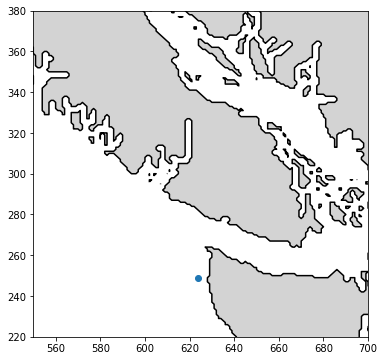

In [15]:
fig, ax = plt.subplots(1,1,figsize=(6,6))

ax.contourf(data.tmask[0, 0, ...], levels=[-0.01, 0.01], colors='lightgray')
ax.contour(data.tmask[0, 0, ...], levels=[-0.01, 0.01], colors='k')
ax.scatter(x,y)
ax.set_xlim([550,700])
ax.set_ylim([220,380])